In [240]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import warnings

# Disable SettingWithCopyWarning
warnings.filterwarnings('ignore')

In [241]:
# IMPORT DATA SETS
# 'm' = monthly data
# 'w' = weekly data
df_consumption_m = pd.read_excel('NG_CONS.xls', sheet_name='Data 1', header=2)
df_production_m = pd.read_excel('NG_PROD.xls', sheet_name='Data 1', header=2)
df_storage_w = pd.read_excel('NG_STOR.xls', sheet_name='Data 1', header=2)
df_price_m = pd.read_excel('NG_PRI_FUT_S1.xls', sheet_name='Data 1', header=2)
df_import_m = pd.read_excel('NG_MOVE_IMP.xls', sheet_name='Data 1', header=2)
df_export_m = pd.read_excel('NG_MOVE_EXP.xls', sheet_name='Data 1', header=2)



In [242]:
#Import Commitment of traders data from 2006-2016
df_cot_2006_2015_w = pd.read_excel('F_DisAgg06_15.xls')
#Import data from 2016-2024 in individual excel sheets
df_cot_2016_w = pd.read_excel('COT_2016.xls')
df_cot_2017_w = pd.read_excel('COT_2017.xls')
df_cot_2018_w = pd.read_excel('COT_2018.xls')
df_cot_2019_w = pd.read_excel('COT_2019.xls')
df_cot_2020_w = pd.read_excel('COT_2020.xls')
df_cot_2021_w = pd.read_excel('COT_2021.xls')
df_cot_2022_w = pd.read_excel('COT_2022.xls')
df_cot_2023_w = pd.read_excel('COT_2023.xls')
df_cot_2024_w = pd.read_excel('COT_2024.xls')


In [243]:
df_cot_w = pd.concat([df_cot_2006_2015_w, df_cot_2016_w, df_cot_2017_w, df_cot_2018_w, df_cot_2019_w, df_cot_2020_w, df_cot_2021_w, df_cot_2022_w, df_cot_2023_w ,df_cot_2024_w])
# Select only Henry Hub nat gas data
df_cot_w = df_cot_w.loc[df_cot_w['Market_and_Exchange_Names'] == 'HENRY HUB LAST DAY FIN - NEW YORK MERCANTILE EXCHANGE']

In [244]:
# Convert weekly storage to monthly
df_storage_w['Month'] = df_storage_w['Date'].dt.month
df_storage_w['Year'] = df_storage_w['Date'].dt.year
df_storage_m = df_storage_w.groupby(['Year', 'Month']).mean()

# Convert weekly COT to monthly
df_cot_w['Month'] = df_cot_w['Report_Date_as_MM_DD_YYYY'].dt.month
df_cot_w['Year'] = df_cot_w['Report_Date_as_MM_DD_YYYY'].dt.year
df_cot_m = df_cot_w.groupby(['Year', 'Month']).mean()

# Separate month and year from date in the rest of the dataframes to allow easy merging
df_consumption_m['Month'] = df_consumption_m['Date'].dt.month
df_consumption_m['Year'] = df_consumption_m['Date'].dt.year
df_consumption_m = df_consumption_m.groupby(['Year', 'Month']).mean()

df_production_m['Month'] = df_production_m['Date'].dt.month
df_production_m['Year'] = df_production_m['Date'].dt.year
df_production_m = df_production_m.groupby(['Year', 'Month']).mean()

df_price_m['Month'] = df_price_m['Date'].dt.month
df_price_m['Year'] = df_price_m['Date'].dt.year
df_price_m = df_price_m.groupby(['Year', 'Month']).mean()

df_import_m['Month'] = df_import_m['Date'].dt.month
df_import_m['Year'] = df_import_m['Date'].dt.year
df_import_m = df_import_m.groupby(['Year', 'Month']).mean()

df_export_m['Month'] = df_export_m['Date'].dt.month
df_export_m['Year'] = df_export_m['Date'].dt.year
df_export_m = df_export_m.groupby(['Year', 'Month']).mean()

In [245]:
# Merge all data frames on Month and Year
df_full = df_cot_m.merge(df_production_m, on=['Month', 'Year']).merge(df_storage_m, on=['Month', 'Year']).merge(df_consumption_m, on=['Month', 'Year']).merge(df_price_m, on=['Month', 'Year']).merge(df_import_m, on=['Month', 'Year']).merge(df_export_m, on=['Month', 'Year'])

In [247]:
df = df_full[['U.S. Natural Gas Imports (MMcf)', 'U.S. Natural Gas Exports (MMcf)', 'Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)', 'U.S. Natural Gas Marketed Production (MMcf)', 'U.S. Natural Gas Total Consumption (MMcf)', 'Henry Hub Natural Gas Spot Price (Dollars per Million Btu)', 'Prod_Merc_Positions_Long_ALL', 'Prod_Merc_Positions_Short_ALL']]


In [248]:
df['Date'] = [dt.datetime(year, month, 1) for month, year in df['U.S. Natural Gas Imports (MMcf)'].index]

In [249]:
df

,,U.S. Natural Gas Imports (MMcf),U.S. Natural Gas Exports (MMcf),Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet),U.S. Natural Gas Marketed Production (MMcf),U.S. Natural Gas Total Consumption (MMcf),Henry Hub Natural Gas Spot Price (Dollars per Million Btu),Prod_Merc_Positions_Long_ALL,Prod_Merc_Positions_Short_ALL,Date
Month,Year,,,,,,,,,
11,2011,248908.0,127599.0,3844.25,2076152.0,2031872.0,3.24,565.00,610.0,2011-11-01
12,2011,297733.0,134374.0,3641.20,2134904.0,2541878.0,3.17,565.00,797.5,2011-12-01
1,2012,281131.0,130464.0,3182.75,2152698.0,2756180.0,2.67,1223.00,1674.0,2012-01-01
2,2012,269906.0,130175.0,2689.25,1974431.0,2500654.0,2.51,1483.75,2100.0,2012-02-01
3,2012,265152.0,141164.0,2416.60,2118693.0,2127761.0,2.17,1317.50,2120.0,2012-03-01
...,...,...,...,...,...,...,...,...,...,...
9,2023,230008.0,625625.0,3285.20,3426002.0,2372887.0,2.64,161434.75,80991.0,2023-09-01
10,2023,230969.0,651805.0,3658.50,3536693.0,2438397.0,2.98,153580.00,85366.4,2023-10-01
11,2023,251536.0,654710.0,3817.00,3468760.0,2823354.0,2.71,164974.75,97937.5,2023-11-01


In [256]:
df['Net_Imports_MMcf'] = df['U.S. Natural Gas Imports (MMcf)'] - df['U.S. Natural Gas Exports (MMcf)']
df['Storage_Change_MMcf'] = (df['Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)'].diff())*1000
df['Estimated_Storage_Change_MMcf'] = df['Net_Imports_MMcf'] + df['U.S. Natural Gas Marketed Production (MMcf)'] - df['U.S. Natural Gas Total Consumption (MMcf)']

In [ ]:
#Regress predicted storage on actual storage and check that error term is mean zero homoskedastic
#Or just plot the difference between the two and check its mean zero homoskedastic

In [259]:
df.to_csv('clean_data.csv')

In [279]:
from meteostat import Point, Monthly
#Set start and end date for temperature data
start = dt.datetime(2011, 11, 1)
end = dt.datetime(2024, 1, 1)

# Create Point for Cities
newyork = Point(40.7143, -74.006)
chicago = Point(41.85, -87.65)
orlando = Point(28.5383, -81.3792)
denver = Point(39.7392, -104.9847)
oklahomacity = Point(35.4676, -97.5164)
knoxville = Point(35.9606, -83.9207)
losangeles = Point(34.0522, -118.2437)
seattle = Point(47.6062, -122.3321)
lasvegas = Point(36.175, -115.1372)



# Get monthly data since 2011
newyork_temp = Monthly(newyork, start, end).fetch()
chicago_temp = Monthly(chicago, start, end).fetch()
orlando_temp = Monthly(orlando, start, end).fetch()
denver_temp = Monthly(denver, start, end).fetch()
oklahomacity_temp = Monthly(oklahomacity, start, end).fetch()
knoxville_temp = Monthly(knoxville, start, end).fetch()
losangeles_temp = Monthly(losangeles, start, end).fetch()
seattle_temp = Monthly(seattle, start, end).fetch()
lasvegas_temp = Monthly(lasvegas, start, end).fetch()

#regress price on the temperature of all these places can we infer which place has largest population (consumes most) by the significance of its coefficent 

In [ ]:
# Finally how accurately can we predict OUT OF SAMPLE price with EDD, HDD, NET PRODUCER COT (natural log) 
# + ~[storage, production, consumption, export, import]

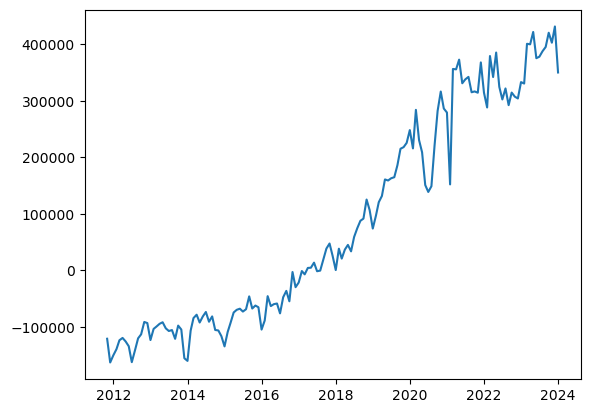

In [251]:
plt.plot(df['Date'], df['U.S. Natural Gas Exports (MMcf)'].values - df['U.S. Natural Gas Imports (MMcf)'].values)
plt.plot(df['Date'], df['U.S. Natural Gas Marketed Production (MMcf)'])
plt.plot(df['Date'], df['U.S. Natural Gas Total Consumption (MMcf)'])


plt.plot(df['Date'], df['U.S. Natural Gas Marketed Production (MMcf)'].values - df['U.S. Natural Gas Total Consumption (MMcf)'].values + df['U.S. Natural Gas Exports (MMcf)'].values - df['U.S. Natural Gas Imports (MMcf)'].values)
plt.plot(df['Date'], df['Weekly Lower 48 States Natural Gas Working Underground Storage (Billion Cubic Feet)']*1000)
#1000 MMcf = 1 Billion Cubic Feet

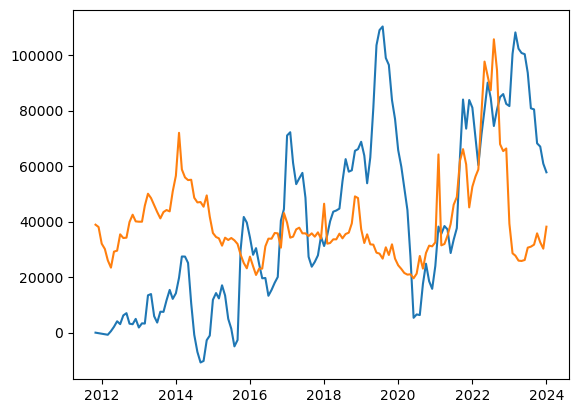

In [250]:
plt.plot(df['Date'], df['Prod_Merc_Positions_Long_ALL'].values - df['Prod_Merc_Positions_Short_ALL'].values)
plt.plot(df['Date'], df['Henry Hub Natural Gas Spot Price (Dollars per Million Btu)'].values*12000)
